In [1]:
import pickle

emukit_model = pickle.load(open('../experimental_design/timeLoss_model_variance_100_iter_batch_size_1.pkl', "rb"))
emukit_model.optimize()

In [2]:
from experimental_design.config import get_ofat_parameter_spaces
parameter_spaces = get_ofat_parameter_spaces()

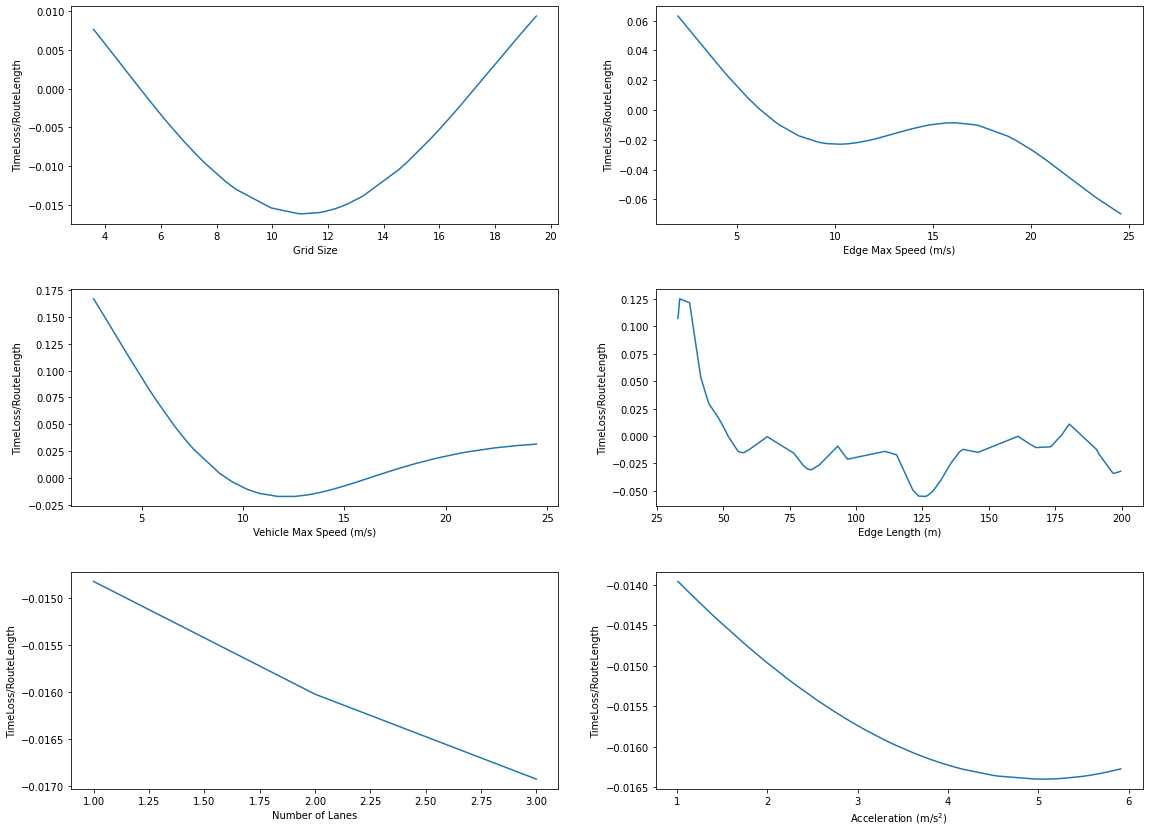

In [3]:
from emukit.core.initial_designs import RandomDesign
import pandas as pd
import matplotlib.pyplot as plt

num_data_points = 50
fig, axs = plt.subplots(len(parameter_spaces)//2, 2, figsize=[6.4*(len(parameter_spaces)//2), 4.8 * 3])
for idx, space_dict in enumerate(parameter_spaces):
    parameter_name = space_dict['name']
    parameter_space = space_dict['space']
    design = RandomDesign(parameter_space)  # initialize with random points
    test_X = design.get_samples(num_data_points)
    pred_Y, pred_Y_variance = emukit_model.predict(test_X)
    x = test_X[:, idx]
    y = pred_Y[:, 0]
    p = x.argsort()
    x = x[p]
    y = y[p]
    data = {'x': x, 'y': y}
    ax = axs[idx//2][idx%2]
    pd.DataFrame(data).plot.line(x='x', y='y', ax=ax, legend=False)
    ax.set_ylabel('TimeLoss/RouteLength')
    ax.set_xlabel(parameter_name)
plt.subplots_adjust(hspace=0.3)
fig.show()